In [1]:
import numpy as np
import matplotlib.pyplot as plt

## $ Tcalc_i = T0 + \frac{\sqrt{(xs_i - x_0)^2 + (ys_i - y_0)^2 + (zs_i - z_0)^2}}{V_p}$

In [2]:
# parameter model sintetik (koordinat hiposenter)
x0 = 1300
y0 = 2050
z0 = -1000

# parameter model sintetik (Vp dan T0)
t0 = 0
vp = 5.1 # (km/s)

In [3]:
# data koordinat titik stasiun
xs = np.array([700, 1900, 1200, 1350])
ys = np.array([2300, 2000, 3500, 800])
zs = np.zeros(4)

In [4]:
# fungsi menghitung travel time
def travel_time(xhipo, yhipo, zhipo, xsi, ysi, zsi):
    return t0 + (np.sqrt((xsi-xhipo)**2 + (ysi-yhipo)**2 + (zsi-zhipo)**2)/(vp))

In [5]:
# membuat t observasi
t_obs = travel_time(x0, y0, z0, xs, ys, zs)
t_obs

array([233.86000866, 228.87485353, 345.9270346 , 314.0317133 ])

[700, 1500, -700]
[ 1338.80170624  2035.8673381  -1488.26279497]
[ 1293.14611292  2050.54312446 -1027.67540229]
[ 1300.1502177   2049.99656924 -1000.16592554]
[ 1299.99998264  2049.99999978 -1000.00001501]
[ 1300.  2050. -1000.]
[ 1300.  2050. -1000.]
[ 1300.  2050. -1000.]


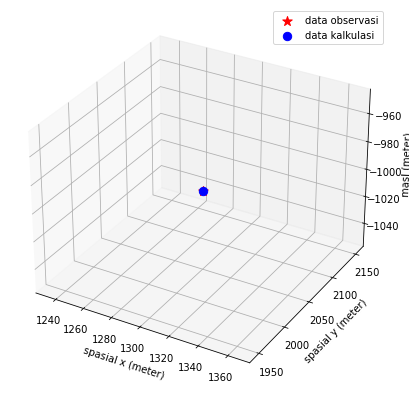

In [6]:
# model referensi
m_ref = [700, 1500, -700] # [x0,y0,z0]

iterasi = 10
misfit = np.array([np.inf])
for i in range(iterasi):
    print(m_ref)
    # forward modelling
    t_fm = travel_time(m_ref[0], m_ref[1], m_ref[2], xs, ys, zs)
    delta_t = t_obs - t_fm
    
    # menghitung error
    rms = np.sqrt(np.mean((delta_t)**2))
    misfit = np.append(misfit, rms)
    
    if np.isclose(misfit[i-1], misfit[i]) or misfit[i] == 10e-5:
        break
    else:
        # matrix jacobi
        dtdx0 = (m_ref[0]-xs)/(vp*np.sqrt((m_ref[0]-xs)**2 + (m_ref[1]-ys)**2 + (m_ref[2]-zs)**2))
        dtdy0 = (m_ref[1]-ys)/(vp*np.sqrt((m_ref[0]-xs)**2 + (m_ref[1]-ys)**2 + (m_ref[2]-zs)**2))
        dtdz0 = (m_ref[2]-zs)/(vp*np.sqrt((m_ref[0]-xs)**2 + (m_ref[1]-ys)**2 + (m_ref[2]-zs)**2))
        J = np.column_stack([dtdx0, dtdy0, dtdz0])

        # inversi
        m_calc = np.linalg.inv((J.T).dot(J)).dot(J.T).dot(delta_t)
        m_ref = m_calc + m_ref
        #print(m_ref)
        
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.scatter(x0, y0, z0, label="data observasi", color="red", marker="*", s=100)
ax.scatter(m_ref[0], m_ref[1], m_ref[2], label="data kalkulasi", color="blue", s=70)
ax.legend()
ax.set_xlabel("spasial x (meter)")
ax.set_ylabel("spasial y (meter)")
ax.set_zlabel("masl (meter)")
plt.show()

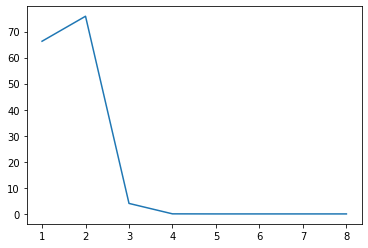

In [7]:
plt.plot(np.arange(len(misfit)), misfit)
plt.show()